# 1.0 - IMPORTS

## 1.1 - LIBRARIES

In [113]:
import pandas as pd
import numpy as np
import inflection
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 1.2 - LOADING DATA

In [114]:
df_raw = pd.read_csv('../data/train.csv', low_memory=True)

## 1.3 - HELPER FUNCTIONS

### 1.3.1 - OUTLIER VOLUMETRY

In [115]:
def outliers_volumetry(data):
    
    df_num = pd.DataFrame()
    df_num = data.select_dtypes(exclude = 'object')
    outlier = []

    for i in df_num.columns:
        q1 = np.quantile(df_num[i], 0.25)
        q3 = np.quantile(df_num[i], 0.75)
        interquartile_distance = q3 - q1
        upper_limit = q3 + 1.5 * interquartile_distance
        lower_limit = q1 - 1.5 * interquartile_distance
        outliers = 0
        for j in df_num.index:
            if df_num[i][j] > upper_limit:
                outliers = outliers + 1
            elif df_num[i][j] < lower_limit:
                outliers = outliers + 1
            else:
                pass

        outlier.append(outliers)

    df_outlier = pd.DataFrame()
    df_outlier['attributes']    = df_num.columns
    df_outlier['quantity']      =   outlier
    df_outlier['percentual']    =   (outlier/df_num['id'].count())*100

    return df_outlier     

### 1.3.2 - PLOT DIMENSIONS

In [116]:
sns.set(rc = {'figure.figsize':(13,5)})

# 2.0 - DATA CLEANING

In [117]:
df2 = df_raw.copy()

## 2.1 - DATA DIMENSIONS

In [118]:
print('Number of Rows {}'.format(df2.shape[0]))
print('Number of Columns {}'.format(df2.shape[1]))
print('\nNumber of Unique Features:')
df2.apply(lambda x: x.nunique())

Number of Rows 513
Number of Columns 22

Number of Unique Features:


ID                                         20
EMPLOYEE                                   20
AGE                                        12
GENDER                                      2
STATUS                                      2
EMPLOYMENT TENURE                           7
EDUCATION DEGREE                            3
PROFESSION                                  7
DAY PERIOD                                  3
MODALITY                                    2
DATE                                       48
CALLS TAKEN                               366
INDIVIDUAL ORDER                          180
NETWORK ORDER                              73
INTERNET ORDER                            144
PHONE ORDER                                12
SLOW CONNECTION ORDER                      39
INSPECTION ORDER                           34
CHANGE TECNOLOGY ORDER                     21
EXCHANGE CUSTOMER EQUIPMENT ORDER COST      3
CHANGE CLIENT POWER ADAPTER ORDER COST     19
NO ACESS CLIENT ORDER COST        

## 2.2 - RENAME COLUMNS

For good practice and to improve usability in data manipulation, we will adopt the snake case pattern to transform the columns

In [119]:
df2.columns

Index(['ID', 'EMPLOYEE', 'AGE', 'GENDER', 'STATUS', 'EMPLOYMENT TENURE',
       'EDUCATION DEGREE', 'PROFESSION', 'DAY PERIOD', 'MODALITY', 'DATE',
       'CALLS TAKEN', 'INDIVIDUAL ORDER', 'NETWORK ORDER', 'INTERNET ORDER',
       'PHONE ORDER', 'SLOW CONNECTION ORDER', 'INSPECTION ORDER',
       'CHANGE TECNOLOGY ORDER', 'EXCHANGE CUSTOMER EQUIPMENT ORDER COST',
       'CHANGE CLIENT POWER ADAPTER ORDER COST', 'NO ACESS CLIENT ORDER COST'],
      dtype='object')

In [120]:
old_columns = df2.columns
new_columns = [inflection.underscore(col.replace(' ', '_')) for col in old_columns]
df2.columns = new_columns
print(new_columns)

['id', 'employee', 'age', 'gender', 'status', 'employment_tenure', 'education_degree', 'profession', 'day_period', 'modality', 'date', 'calls_taken', 'individual_order', 'network_order', 'internet_order', 'phone_order', 'slow_connection_order', 'inspection_order', 'change_tecnology_order', 'exchange_customer_equipment_order_cost', 'change_client_power_adapter_order_cost', 'no_acess_client_order_cost']


## 2.3 - DATA TYPES

Check whether the types of variables remain within the standard of their nature

In [121]:
df2.dtypes

id                                         int64
employee                                  object
age                                        int64
gender                                    object
status                                    object
employment_tenure                         object
education_degree                          object
profession                                object
day_period                                object
modality                                  object
date                                      object
calls_taken                                int64
individual_order                           int64
network_order                              int64
internet_order                             int64
phone_order                                int64
slow_connection_order                      int64
inspection_order                           int64
change_tecnology_order                     int64
exchange_customer_equipment_order_cost     int64
change_client_power_

We can see that the date is not in the correct format. Then the transformation will be applied to its appropriate type

In [122]:
df2['date'] = pd.to_datetime(df2['date'])
df2['date']

0     2023-01-01
1     2023-01-02
2     2023-01-03
3     2023-01-04
4     2023-01-05
         ...    
508   2020-01-08
509   2020-01-09
510   2020-01-10
511   2020-01-11
512   2020-01-12
Name: date, Length: 513, dtype: datetime64[ns]

The date was in a non-standard format (Day and Month in a different order), so we applied a function to order month and day

In [123]:
df2['date'] = pd.to_datetime(df2['date'], format = '%Y-%m-%d')

# Lambda function to reverse the day and month
invert = lambda x: x.replace(day = x.month, month = x.day)

# Apply lambda function to 'date' column
df2['date'] = df2['date'].apply(invert)

# If you want, you can convert it back to a string in the format 'YYYY-MM-DD'
df2['date'] = df2['date'].dt.strftime('%Y-%m-%d')

#Converting back to datetime format
df2['date'] = pd.to_datetime(df2['date'])

print(df2['date'])

0     2023-01-01
1     2023-02-01
2     2023-03-01
3     2023-04-01
4     2023-05-01
         ...    
508   2020-08-01
509   2020-09-01
510   2020-10-01
511   2020-11-01
512   2020-12-01
Name: date, Length: 513, dtype: datetime64[ns]


## 2.4 - DATA VOLUMETRY

### 2.4.1 - NA VOLUMETRY

In [124]:
df2.isna().sum()

id                                        0
employee                                  0
age                                       0
gender                                    0
status                                    0
employment_tenure                         0
education_degree                          0
profession                                0
day_period                                0
modality                                  0
date                                      0
calls_taken                               0
individual_order                          0
network_order                             0
internet_order                            0
phone_order                               0
slow_connection_order                     0
inspection_order                          0
change_tecnology_order                    0
exchange_customer_equipment_order_cost    0
change_client_power_adapter_order_cost    0
no_acess_client_order_cost                0
dtype: int64

### 2.4.2 - NULL VOLUMETRY

In [125]:
df2.isnull().sum()

id                                        0
employee                                  0
age                                       0
gender                                    0
status                                    0
employment_tenure                         0
education_degree                          0
profession                                0
day_period                                0
modality                                  0
date                                      0
calls_taken                               0
individual_order                          0
network_order                             0
internet_order                            0
phone_order                               0
slow_connection_order                     0
inspection_order                          0
change_tecnology_order                    0
exchange_customer_equipment_order_cost    0
change_client_power_adapter_order_cost    0
no_acess_client_order_cost                0
dtype: int64

### 2.4.3 - DUPLICATE VOLUMETRY

In [126]:
duplicated_rows = df2[df2.duplicated()]
print('Number of Duplicated Rows: {}'.format(duplicated_rows.shape[0]))

Number of Duplicated Rows: 0


### 2.4.4 - NA VOLUMETRY

Let's plot a boxplot for each feature to determine the quartiles where outliers are concentrated.

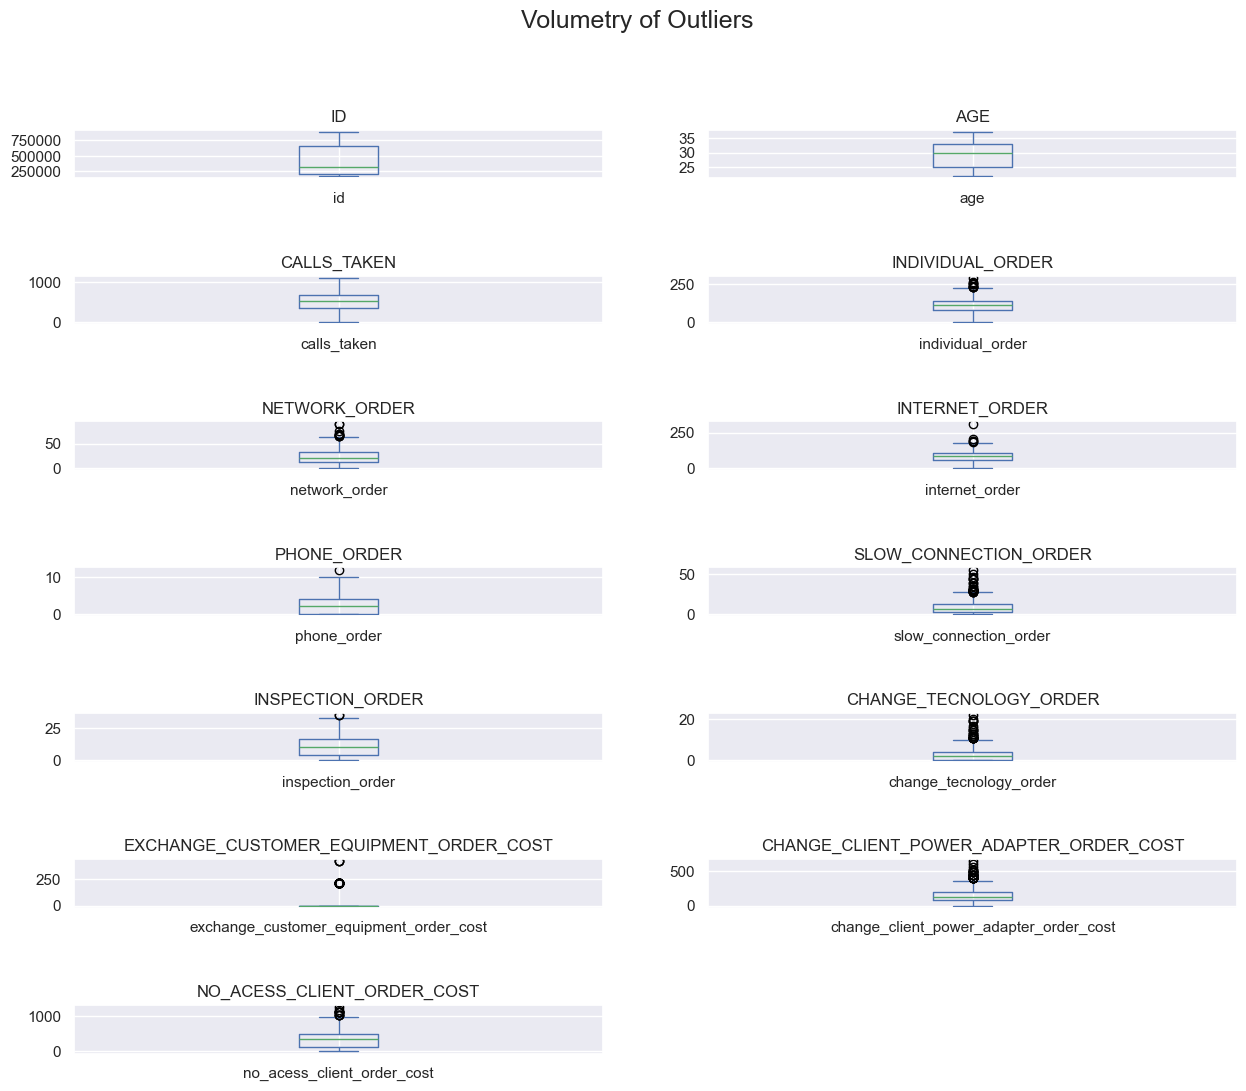

In [127]:
df_numerical = df2.select_dtypes(exclude = ('object','datetime64'))

# Creating the subplots for the dashbord of the boxplot

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace = 2)
plt.suptitle("Volumetry of Outliers", fontsize=18)

# loop through the length of pointer and keep track of index
for n, pointer in enumerate(df_numerical.columns):
    
    # add a new subplot iteratively
    ax = plt.subplot(7, 2, n + 1)

    # create a boxplot for the pointer on the new subplot axis
    df_numerical[pointer].plot(kind='box', ax=ax)

    # chart formatting
    ax.set_title(pointer.upper())
    ax.set_xlabel("")

plt.show()

In addition to the percentage of outliers representing a small volume in the data, we will maintain it as it makes sense for the business

In [128]:
outliers_volumetry(df_numerical)

,attributes,quantity,percentual
0,id,0,0.000000
1,age,0,0.000000
2,calls_taken,0,0.000000
3,individual_order,10,1.949318
4,network_order,10,1.949318
5,internet_order,5,0.974659
6,phone_order,1,0.194932
7,slow_connection_order,25,4.873294
8,inspection_order,2,0.389864
9,change_tecnology_order,26,5.068226


# 3.0 - DESCRIPTIVE STATISTICS

In [129]:
df3 = df2.copy()

In [130]:
df2_num = pd.DataFrame()
df2_cat = pd.DataFrame()

df2_num = df3.select_dtypes(exclude = ('object', 'datetime'))
df2_cat = df3.select_dtypes(include = 'object')

Tracking the dataset into numerical and categorical features:


In [131]:
# Tendence central:
# - Mean
# - Median

central_tendence1 = pd.DataFrame(df2_num.apply(lambda x: np.mean(x))).T
central_tendence2 = pd.DataFrame(df2_num.apply(lambda x: np.median(x))).T

# Dispersion:
# - Max
# - Min
# - Range
# - Standart Deviation
# - Skew
# - Kurtosis

dispersion1 = pd.DataFrame(df2_num.apply(lambda x: np.std(x))).T
dispersion2 = pd.DataFrame(df2_num.apply(min)).T
dispersion3 = pd.DataFrame(df2_num.apply(max)).T
dispersion4 = pd.DataFrame(df2_num.apply(lambda x: x.min() - x.max())).T
dispersion5 = pd.DataFrame(df2_num.apply(lambda x: x.skew())).T
dispersion6 = pd.DataFrame(df2_num.apply(lambda x: x.kurtosis())).T

# Concatenating the dataframes

metrics = pd.concat([central_tendence1, central_tendence2, dispersion1, dispersion2, dispersion3, dispersion4, dispersion5, dispersion6]).T.reset_index()
metrics.columns = ['attribuites', 'mean', 'median', 'standart deviation', 'min', 'max', 'range', 'skew', 'kurtosis']
metrics

,attribuites,mean,median,standart deviation,min,max,range,skew,kurtosis
0,id,410995.514620,319752.0,236339.136490,171001.0,888975.0,-717974.0,0.580406,-1.143698
1,age,29.204678,30.0,4.314062,22.0,37.0,-15.0,-0.341042,-1.019718
2,calls_taken,485.966862,514.0,257.394602,0.0,1103.0,-1103.0,-0.323508,-0.509225
3,individual_order,105.044834,112.0,56.753665,0.0,290.0,-290.0,-0.142849,-0.113552
4,network_order,23.633528,20.0,16.249223,0.0,91.0,-91.0,0.966433,0.871859
5,internet_order,77.775828,82.0,43.299564,0.0,313.0,-313.0,0.132526,1.135569
6,phone_order,2.382066,2.0,2.289528,0.0,12.0,-12.0,1.109523,1.061139
7,slow_connection_order,8.633528,6.0,8.864928,0.0,56.0,-56.0,1.742932,4.092123
8,inspection_order,10.830409,10.0,7.995643,0.0,35.0,-35.0,0.525440,-0.317551
9,change_tecnology_order,2.900585,2.0,3.628437,0.0,22.0,-22.0,2.036950,5.130331


# 4.0 - FEATURE ENGINEERING

In [132]:
df4 = df3.copy()

Creating a new feature to measure the performance of each technical attendant based on the number of open calls and incidents

In [133]:
df4['performance'] = df4.apply(lambda x: abs(((x['individual_order'] + x['network_order'])/x['calls_taken']) - 1.0) if x['calls_taken'] != 0 else 0, axis = 1)
df4['performance'] = df4['performance'].apply(lambda x: np.round(float(x*100),2))

Creating a feature for the number of occurrences for changing Router or ONU. The value of this unit occurrence is 210

In [134]:
df4['customer_equipment'] = df4.apply(lambda x: x['exchange_customer_equipment_order_cost']/210 if x['exchange_customer_equipment_order_cost'] != 0 else 0, axis = 1)
df4['customer_equipment'] = df4['customer_equipment'].astype(np.int64)

Creating a feature for the number of occurrences for changing the general power supply. The value of this unit occurrence is 40

In [135]:
df4['power_adapter_order'] = df4.apply(lambda x: x['change_client_power_adapter_order_cost']/40 if x['change_client_power_adapter_order_cost'] != 0 else 0, axis = 1)
df4['power_adapter_order'] = df4['power_adapter_order'].astype(np.int64)

Creating a feature for the number of failures occurring on the part of particular devices or customer dependencies. The value of this unit occurrence is 70

In [136]:
df4['no_acess_client_order'] = df4.apply(lambda x: x['no_acess_client_order_cost']/70 if x['no_acess_client_order_cost'] != 0 else 0, axis = 1)
df4['no_acess_client_order'] = df4['no_acess_client_order'].astype(np.int64)

Extracting the month of the year and the year

In [137]:
df4['month_year'] = df4['date'].dt.month_name()
df4['year']       = df4['date'].dt.year
df4['year'] = df4['year'].astype(np.int64)

Creating a new feature with the index of the month, with the purpose of carrying out seasonal analysis

In [138]:
month_number_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7,
       'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df4['number_month'] = df4['month_year'].map(month_number_dict)


In [139]:
df4.columns

Index(['id', 'employee', 'age', 'gender', 'status', 'employment_tenure',
       'education_degree', 'profession', 'day_period', 'modality', 'date',
       'calls_taken', 'individual_order', 'network_order', 'internet_order',
       'phone_order', 'slow_connection_order', 'inspection_order',
       'change_tecnology_order', 'exchange_customer_equipment_order_cost',
       'change_client_power_adapter_order_cost', 'no_acess_client_order_cost',
       'performance', 'customer_equipment', 'power_adapter_order',
       'no_acess_client_order', 'month_year', 'year', 'number_month'],
      dtype='object')

Reordering the columns

In [140]:
ordered_columns = ['id', 'employee', 'age', 'gender', 'status', 'employment_tenure',
       'education_degree', 'profession', 'day_period', 'modality', 'date', 'number_month', 'month_year', 'year',
       'calls_taken', 'performance', 'individual_order', 'network_order', 'internet_order',
       'phone_order', 'slow_connection_order', 'inspection_order',
       'change_tecnology_order', 'exchange_customer_equipment_order_cost', 'customer_equipment',
       'change_client_power_adapter_order_cost', 'power_adapter_order', 'no_acess_client_order_cost', 'no_acess_client_order']

df4 = df4[ordered_columns]

# 5.0 - EXPLORATORY DATA ANALYSIS (EDA)

In [141]:
df5 = df4.copy()

## 5.1 - UNIVARIATED ANALYSIS

### 5.1.1 - PROPORTION OF EMPLOYEES AND DISMISSAL

In [142]:
print('Total number of employees who worked in the sector in the last 3 years: {}'.format(df5['id'].nunique()))

aux0 = df5.loc[df5['status'] == 'Active']
print('Number of employees in the sector: {}'.format(aux0['id'].nunique()))

aux1 = df5.loc[df5['status'] == 'Inactive']
print('Total number of employees dismissed from the company: {}'.format(aux1['id'].nunique()))

Total number of employees who worked in the sector in the last 3 years: 20
Number of employees in the sector: 10
Total number of employees dismissed from the company: 10


In [143]:
df_aux = df5.loc[df5['status'] == 'Inactive'].drop_duplicates(subset='employee')
result_mean = np.round(df_aux['age'].mean(),0)
print('The average age of employees leaving the department is {}'.format(result_mean))

df_aux1 = df5.loc[df5['status'] == 'Active'].drop_duplicates(subset='employee')
result1_mean = np.round(df_aux1['age'].mean(),0)
print("The average age of the department's employees is {}".format(result1_mean))

The average age of employees leaving the department is 29.0
The average age of the department's employees is 30.0


We can observe that there was an increase in layoffs in the years 2022 and 2023, with a rate of 50% compared to the years 2020 and 2021. This means that each year the department tends to have a turnover of 20% in the total number of employees with a tendency to of growth.

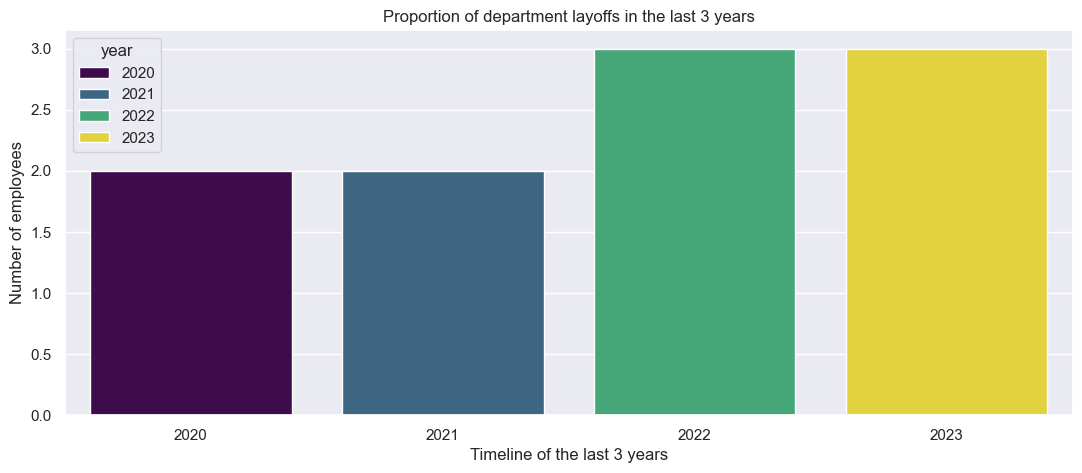

In [144]:
filter_employee = df5[['employee', 'year']].loc[df5['status'] == 'Inactive'].sort_values('year', ascending = False).drop_duplicates(subset='employee').head(10)
sns.countplot(data = filter_employee, x = 'year',  hue = 'year', palette='viridis')
plt.title('Proportion of department layoffs in the last 3 years')
plt.ylabel('Number of employees')
plt.xlabel('Timeline of the last 3 years')
plt.show()

### 5.1.2 - DISTRIBUTION BY ACADEMIC DEGREE

We can observe that the department's employee distribution rate comprises 40% with a university degree and 60% with high school and technical level and university students.
Among the professions there are Data Scientist, DevOps, Logistics Manager and Advertising.

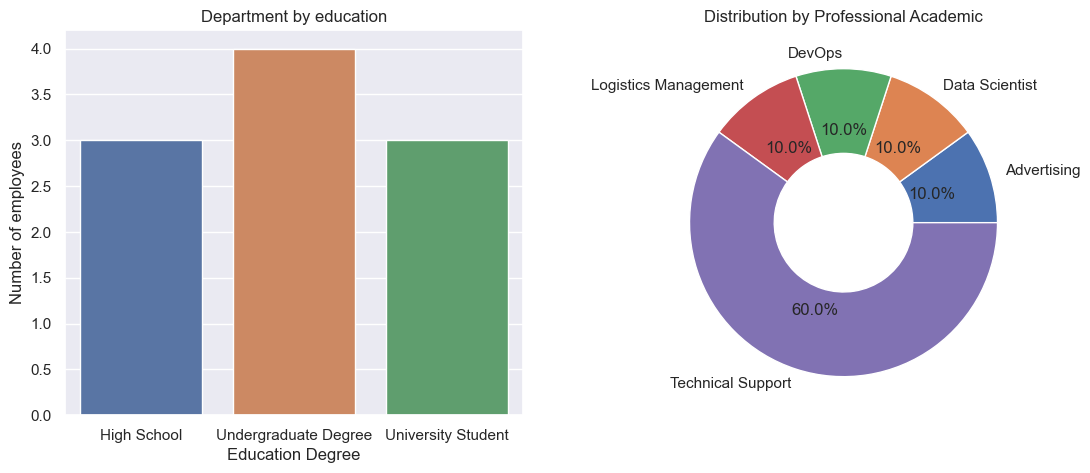

In [145]:
aux01 = df5.loc[df5['status'] == 'Active'].drop_duplicates(subset = 'id')
aux01 = aux01.groupby('education_degree')['id'].count().reset_index()
plt.subplot(1,2,1)
sns.barplot(data = aux01, x = 'education_degree', y = 'id', hue = 'education_degree')
plt.title('Department by education')
plt.ylabel('Number of employees')
plt.xlabel('Education Degree')

plt.subplot(1,2,2)
aux02 = df5.loc[df5['status'] == 'Active'].drop_duplicates(subset='id')
aux02 = aux02.groupby('profession')['id'].count().reset_index()
plt.pie(aux02['id'], labels=aux02['profession'], autopct='%1.1f%%', wedgeprops=dict(width=0.55))
plt.title('Distribution by Professional Academic')
plt.show()

### 5.1.3 - EMPLOYEE PERFORMANCE, CALLS TAKEN AND SERVICES REQUEST

CALLS TAKEN

The graph below evaluates the number of calls per employee and the length of stay at the company. On the left, the total distribution of services in the last 3 years per employee is evaluated, and in the graph on the right, the total for the current year 2023.

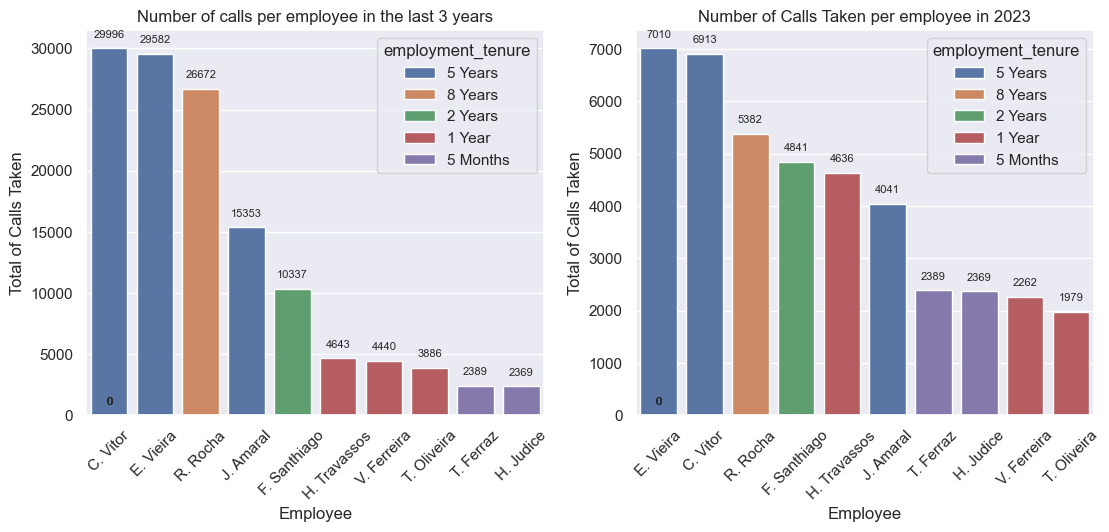

In [146]:
aux00 = df5.loc[df5['status'] == 'Active']
aux00 = aux00.groupby(['employee', 'employment_tenure'])['calls_taken'].sum().reset_index().sort_values('calls_taken', ascending = False)
plt.subplot(1,2,1)
barplot = sns.barplot(data = aux00, x = 'employee', y = 'calls_taken', hue = 'employment_tenure')
plt.title('Number of calls per employee in the last 3 years')
plt.xlabel('Employee')
plt.ylabel('Total of Calls Taken')
plt.xticks(rotation = 45)

for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    
plt.subplot(1,2,2)
aux01 = df5.loc[(df5['status'] == 'Active') & (df5['year'] == 2023)]
aux01 = aux01.groupby(['employee', 'employment_tenure'])['calls_taken'].sum().reset_index().sort_values('calls_taken', ascending = False)
barplot2 = sns.barplot(data = aux01, x = 'employee', y = 'calls_taken', hue = 'employment_tenure')
plt.title('Number of Calls Taken per employee in 2023')
plt.xlabel('Employee')
plt.ylabel('Total of Calls Taken')
plt.xticks(rotation = 45)

for p in barplot2.patches:
    barplot2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()

CALLS BY PERIOD OF THE DAY

The graph displays the frequency of performance scores and average attendance per employee in the department in the last semester

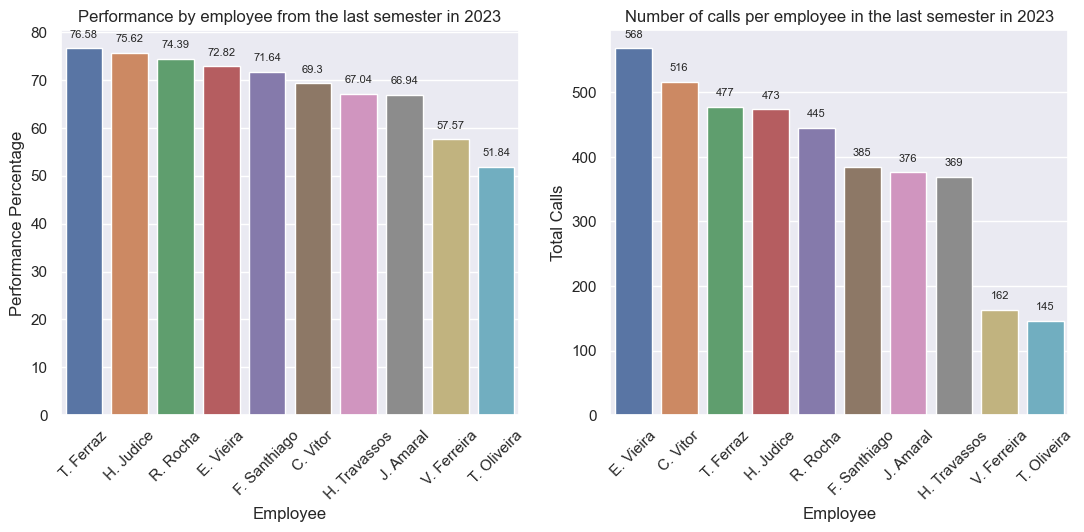

In [147]:
aux01 = aux00 = df5.loc[(df5['status'] == 'Active') & (df5['year'] == 2023) & (df5['number_month'] > 6) & (df5['calls_taken'] > 0)]
aux01 = aux01.groupby(['employee'])['performance'].mean().reset_index().sort_values('performance', ascending = False)
plt.subplot(1,2,1)
barplot2 = sns.barplot(data = aux01, x = 'employee', y = 'performance', hue = 'employee')
plt.title('Performance by employee from the last semester in 2023')
plt.xlabel('Employee')
plt.ylabel('Performance Percentage')
plt.xticks(rotation = 45)

for p in barplot2.patches:
    barplot2.annotate(f'{np.round(float(p.get_height()),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    
plt.subplot(1,2,2)
aux02 = aux02 = df5.loc[(df5['status'] == 'Active') & (df5['year'] == 2023) & (df5['number_month'] > 6) & (df5['calls_taken'] > 0)]
aux02 = aux02.groupby(['employee'])['calls_taken'].mean().reset_index().sort_values('calls_taken', ascending = False)
barplot2 = sns.barplot(data = aux02, x = 'employee', y = 'calls_taken', hue = 'employee')
plt.title('Number of calls per employee in the last semester in 2023')
plt.xlabel('Employee')
plt.ylabel('Total Calls')
plt.xticks(rotation = 45)

for p in barplot2.patches:
    barplot2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()

ORDERS REQUEST

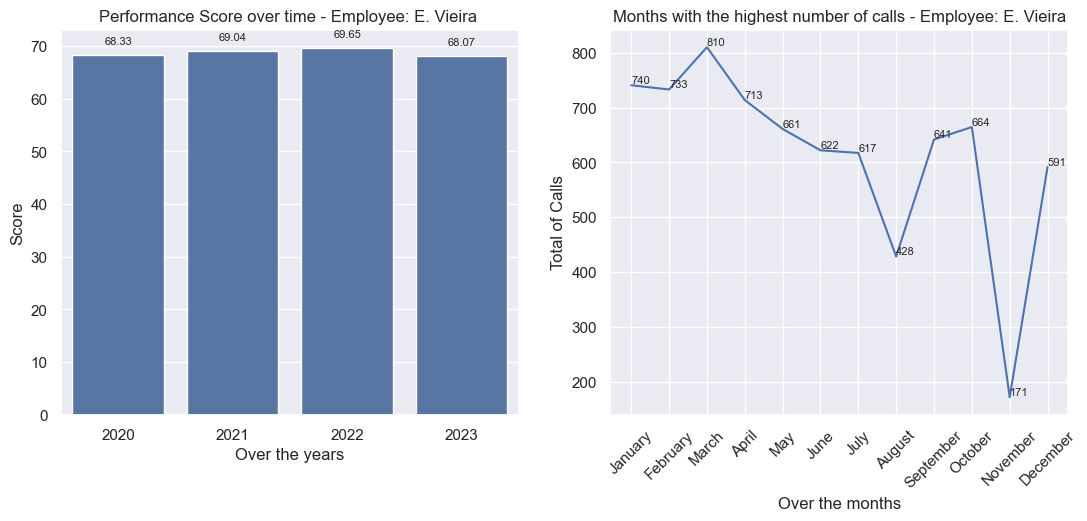

In [148]:
aux00 = df5.loc[df5['employee'] == 'E. Vieira']
aux01 = aux00.groupby(['employee', 'year'])['performance'].mean().reset_index()
plt.subplot(1,2,1)
plot = sns.barplot(data = aux01, x = 'year', y = 'performance')
plt.title('Performance Score over time - Employee: E. Vieira ')
plt.xlabel('Over the years')
plt.ylabel('Score')
for p in plot.patches:
    plot.annotate(f'{np.round(float(p.get_height()),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    
plt.subplot(1,2,2)
aux02 = aux00.groupby(['employee', 'month_year', 'number_month'])['calls_taken'].mean().reset_index().sort_values('number_month', ascending = True)
plot1 = sns.lineplot(data = aux02, x = 'month_year', y = 'calls_taken')
plt.title('Months with the highest number of calls - Employee: E. Vieira')
plt.xlabel('Over the months')
plt.ylabel('Total of Calls')
plt.xticks(rotation = 45)
for line in plot1.lines:
    y_data = line.get_ydata()
    x_data = line.get_xdata()
    for x, y in zip(x_data, y_data):
        plt.text(x, y, f'{int(y)}', ha='left', va='bottom', fontsize=8)
        
plt.show()

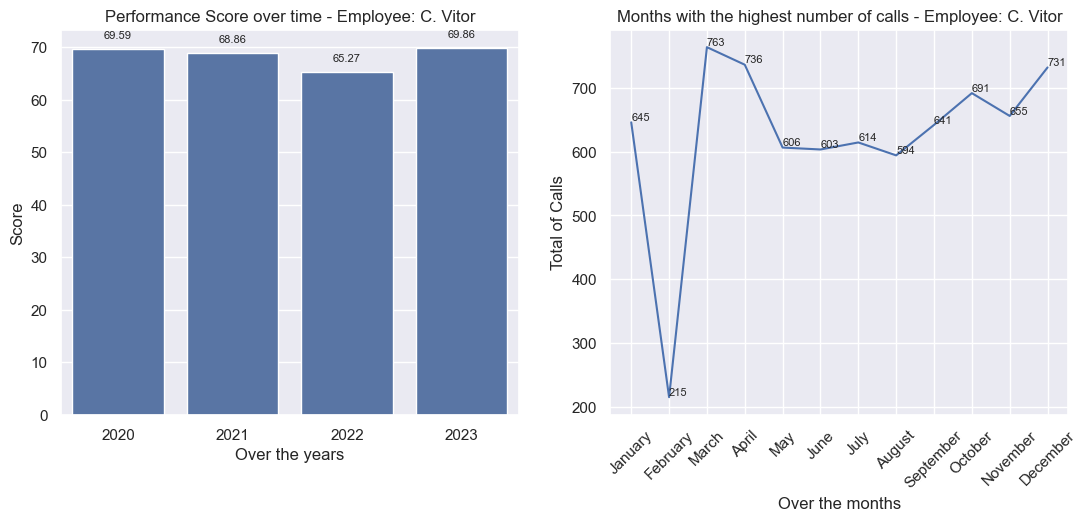

In [149]:
aux00 = df5.loc[df5['employee'] == 'C. Vitor']
aux01 = aux00.groupby(['employee', 'year'])['performance'].mean().reset_index()
plt.subplot(1,2,1)
plot = sns.barplot(data = aux01, x = 'year', y = 'performance')
plt.title('Performance Score over time - Employee: C. Vitor')
plt.xlabel('Over the years')
plt.ylabel('Score')
for p in plot.patches:
    plot.annotate(f'{np.round(float(p.get_height()),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    
plt.subplot(1,2,2)
aux02 = aux00.groupby(['employee', 'month_year', 'number_month'])['calls_taken'].mean().reset_index().sort_values('number_month', ascending = True)
plot1 = sns.lineplot(data = aux02, x = 'month_year', y = 'calls_taken')
plt.title('Months with the highest number of calls - Employee: C. Vitor')
plt.xlabel('Over the months')
plt.ylabel('Total of Calls')
plt.xticks(rotation = 45)
for line in plot1.lines:
    y_data = line.get_ydata()
    x_data = line.get_xdata()
    for x, y in zip(x_data, y_data):
        plt.text(x, y, f'{int(y)}', ha='left', va='bottom', fontsize=8)
        
plt.show()

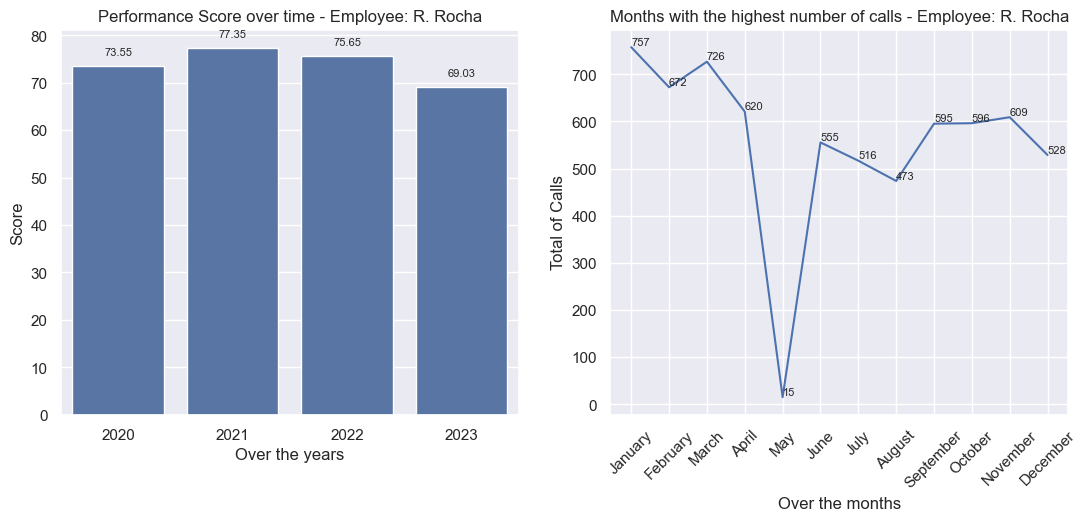

In [150]:
aux00 = df5.loc[df5['employee'] == 'R. Rocha']
aux01 = aux00.groupby(['employee', 'year'])['performance'].mean().reset_index()
plt.subplot(1,2,1)
plot = sns.barplot(data = aux01, x = 'year', y = 'performance')
plt.title('Performance Score over time - Employee: R. Rocha')
plt.xlabel('Over the years')
plt.ylabel('Score')
for p in plot.patches:
    plot.annotate(f'{np.round(float(p.get_height()),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    
plt.subplot(1,2,2)
aux02 = aux00.groupby(['employee', 'month_year', 'number_month'])['calls_taken'].mean().reset_index().sort_values('number_month', ascending = True)
plot1 = sns.lineplot(data = aux02, x = 'month_year', y = 'calls_taken')
plt.title('Months with the highest number of calls - Employee: R. Rocha')
plt.xlabel('Over the months')
plt.ylabel('Total of Calls')
plt.xticks(rotation = 45)
for line in plot1.lines:
    y_data = line.get_ydata()
    x_data = line.get_xdata()
    for x, y in zip(x_data, y_data):
        plt.text(x, y, f'{int(y)}', ha='left', va='bottom', fontsize=8)
        
plt.show()

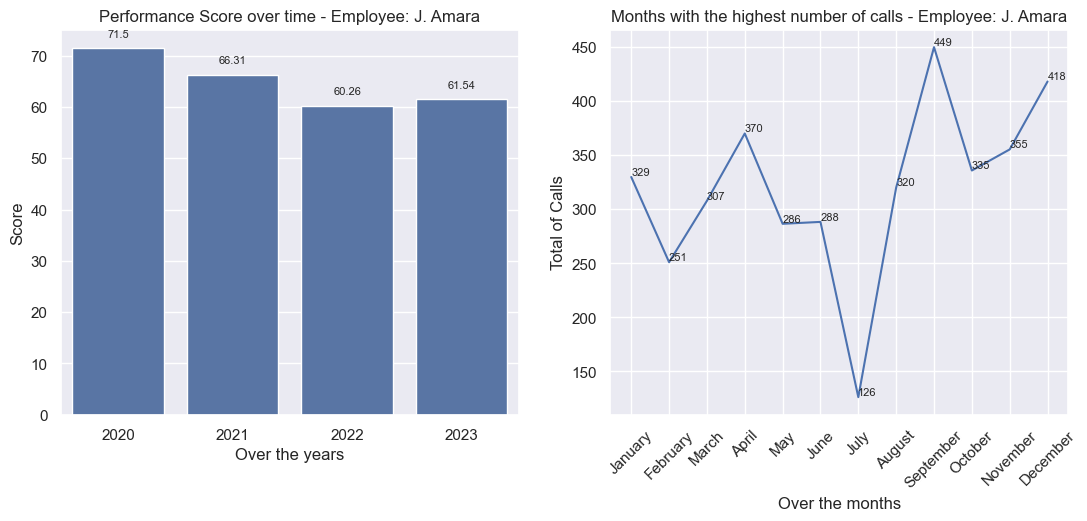

In [151]:
aux00 = df5.loc[df5['employee'] == 'J. Amaral']
aux01 = aux00.groupby(['employee', 'year'])['performance'].mean().reset_index()
plt.subplot(1,2,1)
plot = sns.barplot(data = aux01, x = 'year', y = 'performance')
plt.title('Performance Score over time - Employee: J. Amara')
plt.xlabel('Over the years')
plt.ylabel('Score')
for p in plot.patches:
    plot.annotate(f'{np.round(float(p.get_height()),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    
plt.subplot(1,2,2)
aux02 = aux00.groupby(['employee', 'month_year', 'number_month'])['calls_taken'].mean().reset_index().sort_values('number_month', ascending = True)
plot1 = sns.lineplot(data = aux02, x = 'month_year', y = 'calls_taken')
plt.title('Months with the highest number of calls - Employee: J. Amara')
plt.xlabel('Over the months')
plt.ylabel('Total of Calls')
plt.xticks(rotation = 45)
for line in plot1.lines:
    y_data = line.get_ydata()
    x_data = line.get_xdata()
    for x, y in zip(x_data, y_data):
        plt.text(x, y, f'{int(y)}', ha='left', va='bottom', fontsize=8)
        
plt.show()

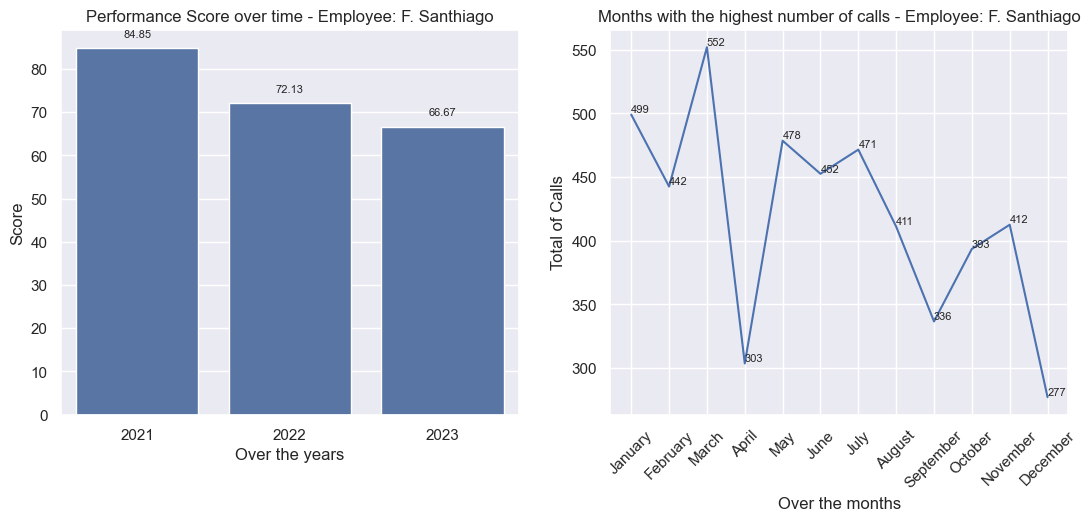

In [152]:
aux00 = df5.loc[df5['employee'] == 'F. Santhiago']
aux01 = aux00.groupby(['employee', 'year'])['performance'].mean().reset_index()
plt.subplot(1,2,1)
plot = sns.barplot(data = aux01, x = 'year', y = 'performance')
plt.title('Performance Score over time - Employee: F. Santhiago')
plt.xlabel('Over the years')
plt.ylabel('Score')
for p in plot.patches:
    plot.annotate(f'{np.round(float(p.get_height()),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    
plt.subplot(1,2,2)
aux02 = aux00.groupby(['employee', 'month_year', 'number_month'])['calls_taken'].mean().reset_index().sort_values('number_month', ascending = True)
plot1 = sns.lineplot(data = aux02, x = 'month_year', y = 'calls_taken')
plt.title('Months with the highest number of calls - Employee: F. Santhiago')
plt.xlabel('Over the months')
plt.ylabel('Total of Calls')
plt.xticks(rotation = 45)
for line in plot1.lines:
    y_data = line.get_ydata()
    x_data = line.get_xdata()
    for x, y in zip(x_data, y_data):
        plt.text(x, y, f'{int(y)}', ha='left', va='bottom', fontsize=8)
        
plt.show()

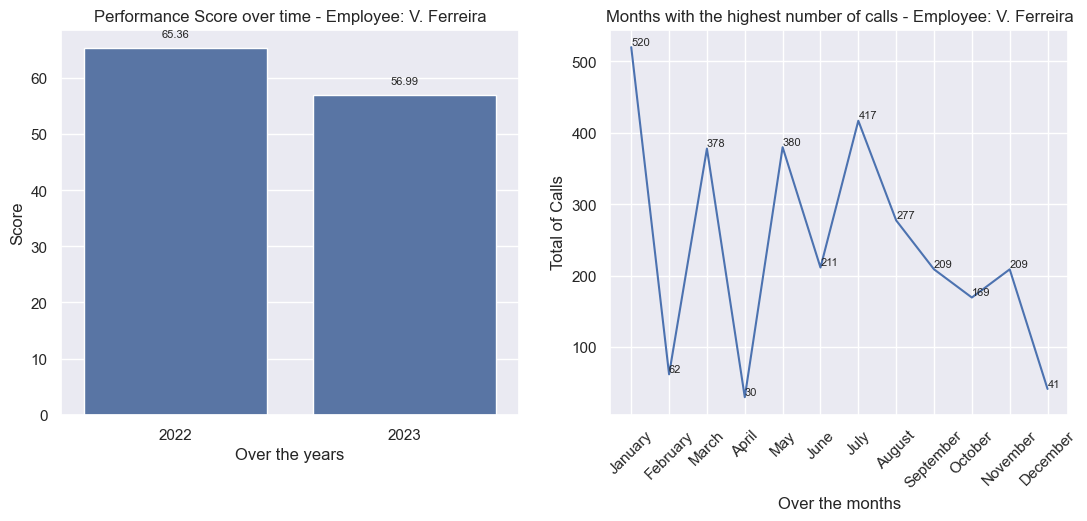

In [153]:
aux00 = df5.loc[df5['employee'] == 'V. Ferreira']
aux01 = aux00.groupby(['employee', 'year'])['performance'].mean().reset_index()
plt.subplot(1,2,1)
plot = sns.barplot(data = aux01, x = 'year', y = 'performance')
plt.title('Performance Score over time - Employee: V. Ferreira')
plt.xlabel('Over the years')
plt.ylabel('Score')
for p in plot.patches:
    plot.annotate(f'{np.round(float(p.get_height()),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    
plt.subplot(1,2,2)
aux02 = aux00.groupby(['employee', 'month_year', 'number_month'])['calls_taken'].mean().reset_index().sort_values('number_month', ascending = True)
plot1 = sns.lineplot(data = aux02, x = 'month_year', y = 'calls_taken')
plt.title('Months with the highest number of calls - Employee: V. Ferreira')
plt.xlabel('Over the months')
plt.ylabel('Total of Calls')
plt.xticks(rotation = 45)
for line in plot1.lines:
    y_data = line.get_ydata()
    x_data = line.get_xdata()
    for x, y in zip(x_data, y_data):
        plt.text(x, y, f'{int(y)}', ha='left', va='bottom', fontsize=8)
        
plt.show()

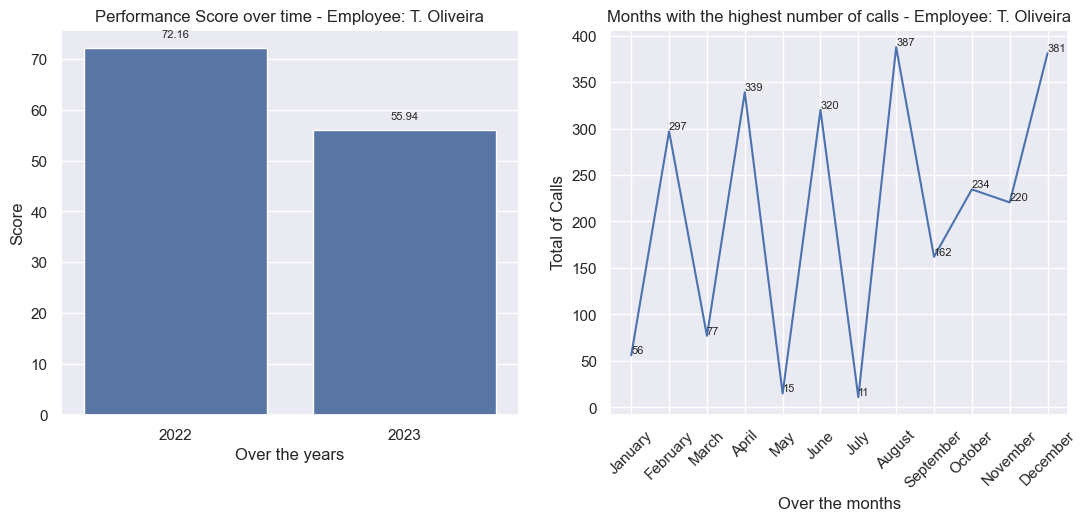

In [154]:
aux00 = df5.loc[df5['employee'] == 'T. Oliveira']
aux01 = aux00.groupby(['employee', 'year'])['performance'].mean().reset_index()
plt.subplot(1,2,1)
plot = sns.barplot(data = aux01, x = 'year', y = 'performance')
plt.title('Performance Score over time - Employee: T. Oliveira')
plt.xlabel('Over the years')
plt.ylabel('Score')
for p in plot.patches:
    plot.annotate(f'{np.round(float(p.get_height()),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    
plt.subplot(1,2,2)
aux02 = aux00.groupby(['employee', 'month_year', 'number_month'])['calls_taken'].mean().reset_index().sort_values('number_month', ascending = True)
plot1 = sns.lineplot(data = aux02, x = 'month_year', y = 'calls_taken')
plt.title('Months with the highest number of calls - Employee: T. Oliveira')
plt.xlabel('Over the months')
plt.ylabel('Total of Calls')
plt.xticks(rotation = 45)
for line in plot1.lines:
    y_data = line.get_ydata()
    x_data = line.get_xdata()
    for x, y in zip(x_data, y_data):
        plt.text(x, y, f'{int(y)}', ha='left', va='bottom', fontsize=8)
        
plt.show()

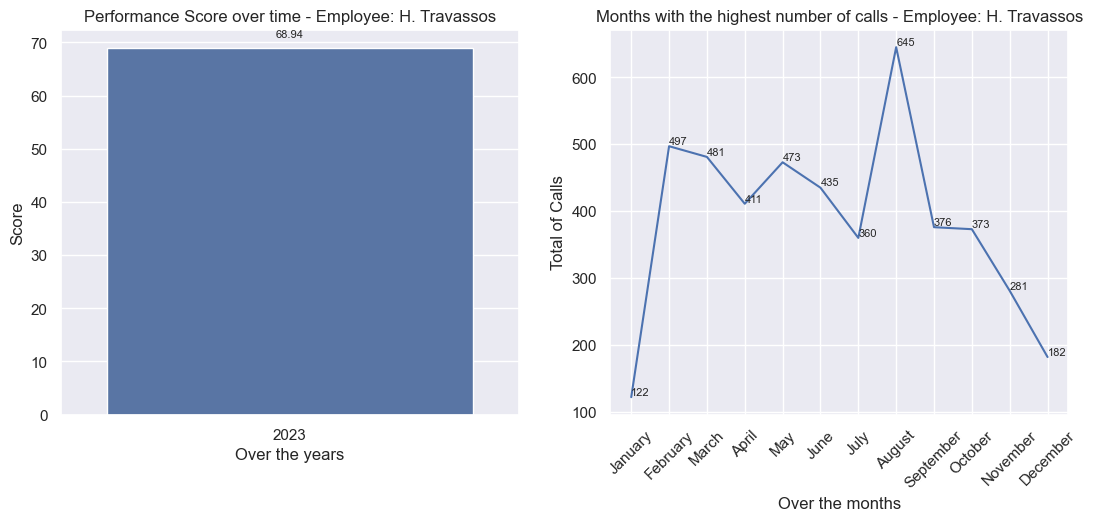

In [155]:
aux00 = df5.loc[(df5['employee'] == 'H. Travassos') & (df5['year'] != 2022)]
aux01 = aux00.groupby(['employee', 'year'])['performance'].mean().reset_index()
plt.subplot(1,2,1)
plot = sns.barplot(data = aux01, x = 'year', y = 'performance')
plt.title('Performance Score over time - Employee: H. Travassos')
plt.xlabel('Over the years')
plt.ylabel('Score')
for p in plot.patches:
    plot.annotate(f'{np.round(float(p.get_height()),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    
plt.subplot(1,2,2)
aux02 = aux00.groupby(['employee', 'month_year', 'number_month'])['calls_taken'].mean().reset_index().sort_values('number_month', ascending = True)
plot1 = sns.lineplot(data = aux02, x = 'month_year', y = 'calls_taken')
plt.title('Months with the highest number of calls - Employee: H. Travassos')
plt.xlabel('Over the months')
plt.ylabel('Total of Calls')
plt.xticks(rotation = 45)
for line in plot1.lines:
    y_data = line.get_ydata()
    x_data = line.get_xdata()
    for x, y in zip(x_data, y_data):
        plt.text(x, y, f'{int(y)}', ha='left', va='bottom', fontsize=8)
        
plt.show()

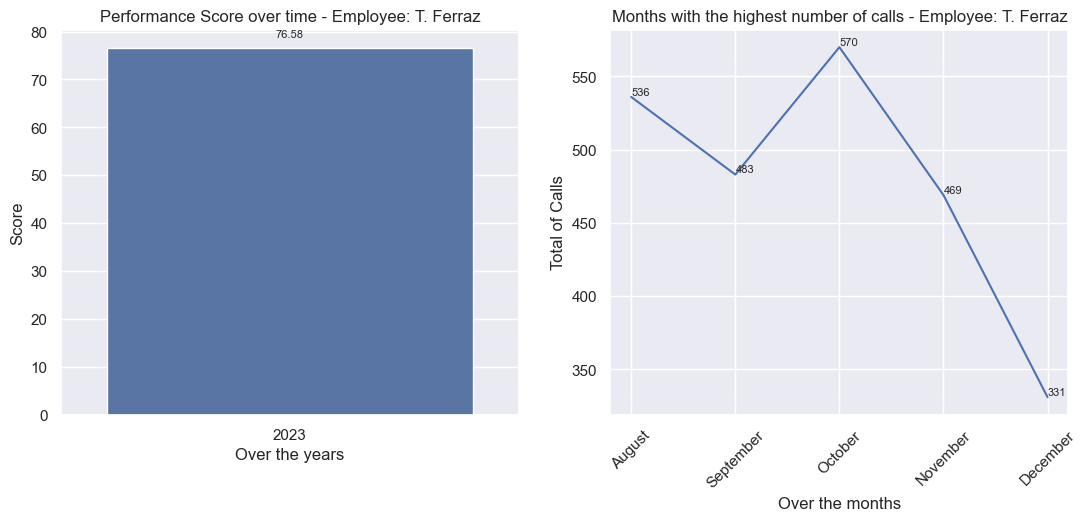

In [156]:
aux00 = df5.loc[df5['employee'] == 'T. Ferraz']
aux01 = aux00.groupby(['employee', 'year'])['performance'].mean().reset_index()
plt.subplot(1,2,1)
plot = sns.barplot(data = aux01, x = 'year', y = 'performance')
plt.title('Performance Score over time - Employee: T. Ferraz')
plt.xlabel('Over the years')
plt.ylabel('Score')
for p in plot.patches:
    plot.annotate(f'{np.round(float(p.get_height()),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    
plt.subplot(1,2,2)
aux02 = aux00.groupby(['employee', 'month_year', 'number_month'])['calls_taken'].mean().reset_index().sort_values('number_month', ascending = True)
plot1 = sns.lineplot(data = aux02, x = 'month_year', y = 'calls_taken')
plt.title('Months with the highest number of calls - Employee: T. Ferraz')
plt.xlabel('Over the months')
plt.ylabel('Total of Calls')
plt.xticks(rotation = 45)
for line in plot1.lines:
    y_data = line.get_ydata()
    x_data = line.get_xdata()
    for x, y in zip(x_data, y_data):
        plt.text(x, y, f'{int(y)}', ha='left', va='bottom', fontsize=8)
        
plt.show()

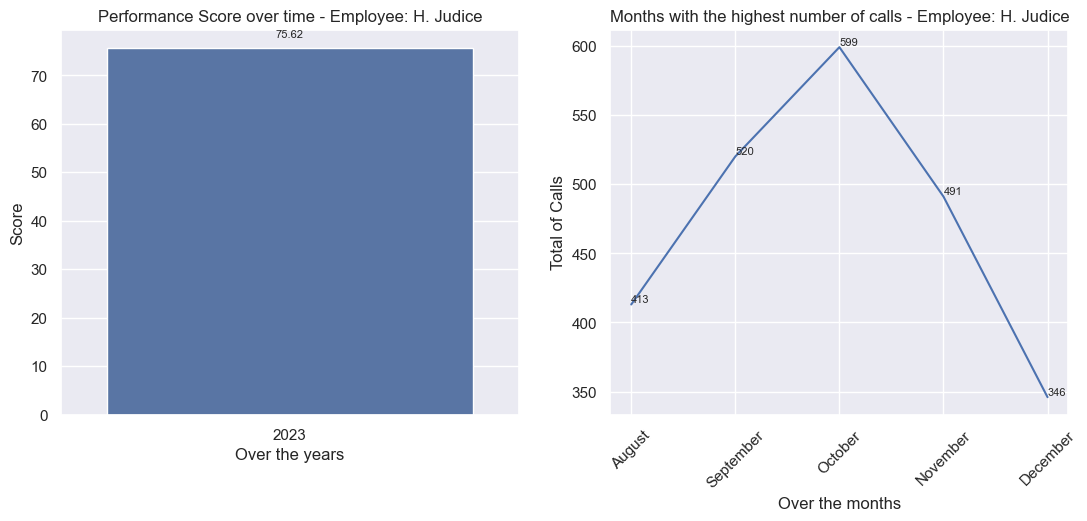

In [157]:
aux00 = df5.loc[df5['employee'] == 'H. Judice']
aux01 = aux00.groupby(['employee', 'year'])['performance'].mean().reset_index()
plt.subplot(1,2,1)
plot = sns.barplot(data = aux01, x = 'year', y = 'performance')
plt.title('Performance Score over time - Employee: H. Judice')
plt.xlabel('Over the years')
plt.ylabel('Score')
for p in plot.patches:
    plot.annotate(f'{np.round(float(p.get_height()),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
    
plt.subplot(1,2,2)
aux02 = aux00.groupby(['employee', 'month_year', 'number_month'])['calls_taken'].mean().reset_index().sort_values('number_month', ascending = True)
plot1 = sns.lineplot(data = aux02, x = 'month_year', y = 'calls_taken')
plt.title('Months with the highest number of calls - Employee: H. Judice')
plt.xlabel('Over the months')
plt.ylabel('Total of Calls')
plt.xticks(rotation = 45)
for line in plot1.lines:
    y_data = line.get_ydata()
    x_data = line.get_xdata()
    for x, y in zip(x_data, y_data):
        plt.text(x, y, f'{int(y)}', ha='left', va='bottom', fontsize=8)
        
plt.show()

## 5.2 - BIVARIATE ANALYSIS

CALLS TAKEN OVER THE TIME

We can observe that there is a downward trend in the department’s average attendance over time.

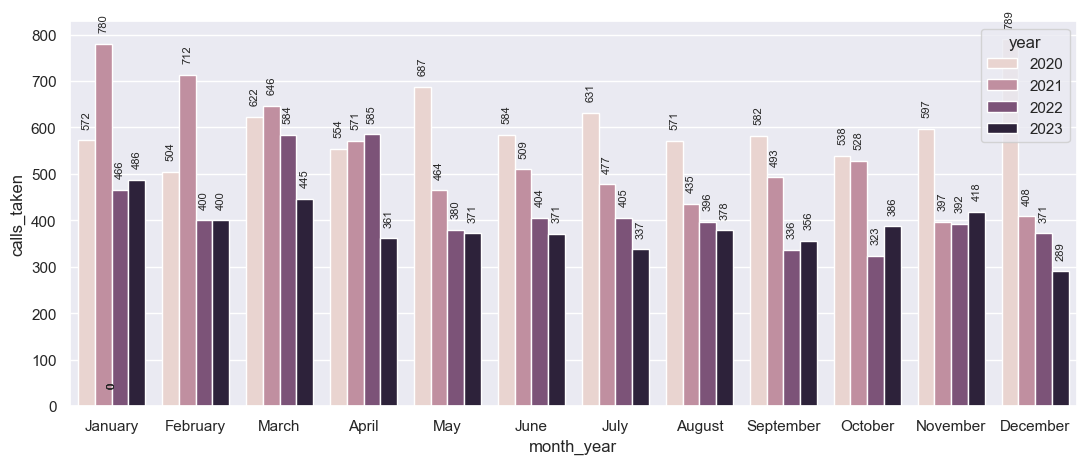

In [158]:
aux = df5.groupby(['year', 'month_year', 'number_month'])['calls_taken'].mean().reset_index().sort_values('number_month', ascending = True)
plot = sns.barplot(data = aux, x = 'month_year', y = 'calls_taken', hue = 'year')
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 15), textcoords='offset points', fontsize=8, rotation='vertical')
plt.show()

PERFORMANCE SCORE OVER THE TIME

We can observe that there is a downward trend in the department's service performance score over time.

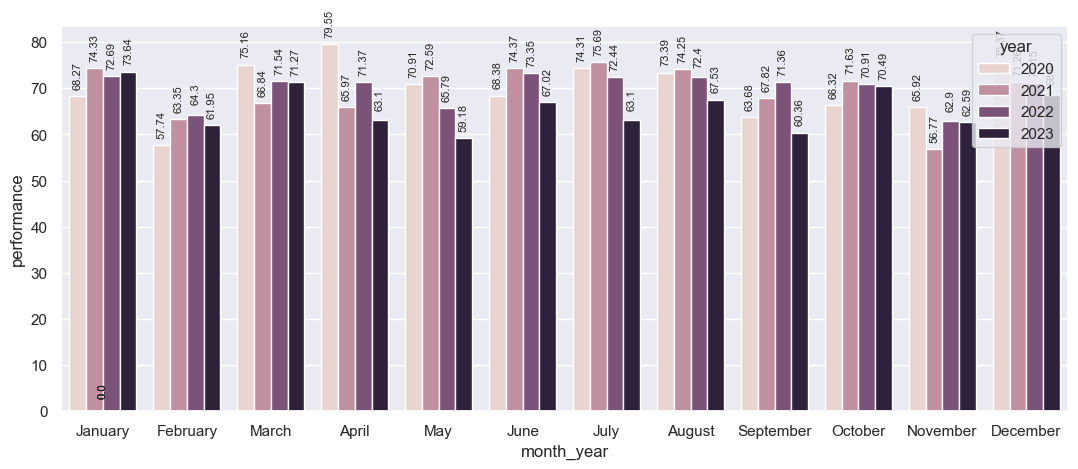

In [159]:
aux = df5.loc[df5['status'] == 'Active']
aux = df5.groupby(['year', 'month_year', 'number_month'])['performance'].mean().reset_index().sort_values('number_month', ascending = True)
plot = sns.barplot(data = aux, x = 'month_year', y = 'performance', hue = 'year')
for p in plot.patches:
    plot.annotate(f'{np.round(float(p.get_height()),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 15), textcoords='offset points', fontsize=8, rotation='vertical')
plt.show()

DISTRIBUTION OF SERVICE ORDER TYPE BY TIME OF DAY

PERFORMANCE SCORE

There was a 15.8% reduction in daytime calls in the 1st half of 2022 compared to the 1st half of 2023, and a 4.6% reduction in the 2nd half of the same years. 
<br>
The night period increased by 17.8% in the 1st half of 2022 compared to the 1st half of 2023, and an increase of 2.9% in the 2nd half of the same years.
<br>
The dawn period had a 2% reduction rate in calls in the 1st half of 2022 compared to the 1st half of 2023, and an increase of 1.8% in the 2nd half for both years.
<br>
<br>
In a general comparison between the years 2022 and 2023, the year 2023 has a reduction of 9.4% fewer calls during the daytime buyer compared to the previous year, the night period of the same year an increase of 9.5% more compared to the previous year , in the early morning period there were no volumetric changes in the connections.

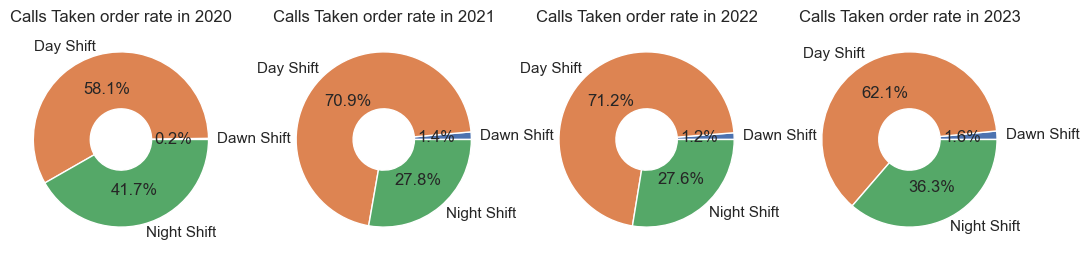

In [160]:
plt.subplot(1,4,1)
aux1 = df5.loc[df5['year'] == 2020]
aux1 = aux1.groupby('day_period')['calls_taken'].sum().reset_index()
plt.pie(aux1['calls_taken'], labels=aux1['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Calls Taken order rate in 2020')

plt.subplot(1,4,2)
aux2 = df5.loc[df5['year'] == 2021]
aux2 = aux2.groupby('day_period')['calls_taken'].sum().reset_index()
plt.pie(aux2['calls_taken'], labels=aux2['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Calls Taken order rate in 2021')

plt.subplot(1,4,3)
aux3 = df5.loc[df5['year'] == 2022]
aux3 = aux3.groupby('day_period')['calls_taken'].sum().reset_index()
plt.pie(aux3['calls_taken'], labels=aux3['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Calls Taken order rate in 2022')

plt.subplot(1,4,4)
aux4 = df5.loc[df5['year'] == 2023]
aux4 = aux4.groupby('day_period')['calls_taken'].sum().reset_index()
plt.pie(aux4['calls_taken'], labels=aux4['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Calls Taken order rate in 2023')

plt.show()

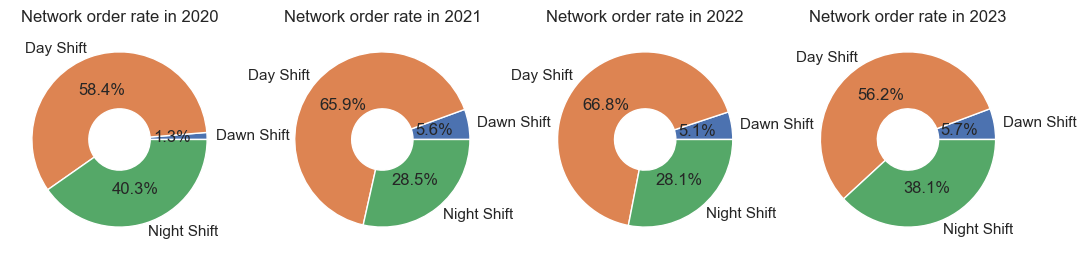

In [161]:
plt.subplot(1,4,1)
aux1 = df5.loc[df5['year'] == 2020]
aux1 = aux1.groupby('day_period')['network_order'].sum().reset_index()
plt.pie(aux1['network_order'], labels=aux1['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Network order rate in 2020')

plt.subplot(1,4,2)
aux2 = df5.loc[df5['year'] == 2021]
aux2 = aux2.groupby('day_period')['network_order'].sum().reset_index()
plt.pie(aux2['network_order'], labels=aux2['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Network order rate in 2021')

plt.subplot(1,4,3)
aux3 = df5.loc[df5['year'] == 2022]
aux3 = aux3.groupby('day_period')['network_order'].sum().reset_index()
plt.pie(aux3['network_order'], labels=aux3['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Network order rate in 2022')

plt.subplot(1,4,4)
aux4 = df5.loc[df5['year'] == 2023]
aux4 = aux4.groupby('day_period')['network_order'].sum().reset_index()
plt.pie(aux4['network_order'], labels=aux4['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Network order rate in 2023')

plt.show()

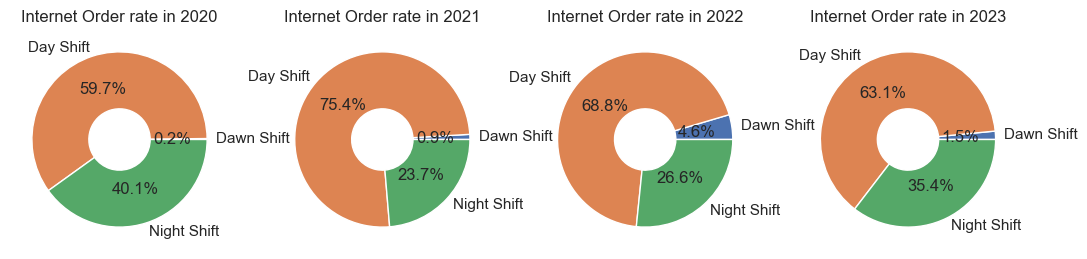

In [162]:
plt.subplot(1,4,1)
aux1 = df5.loc[df5['year'] == 2020]
aux1 = aux1.groupby('day_period')['internet_order'].sum().reset_index()
plt.pie(aux1['internet_order'], labels=aux1['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Internet Order rate in 2020')

plt.subplot(1,4,2)
aux2 = df5.loc[df5['year'] == 2021]
aux2 = aux2.groupby('day_period')['internet_order'].sum().reset_index()
plt.pie(aux2['internet_order'], labels=aux2['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Internet Order rate in 2021')

plt.subplot(1,4,3)
aux3 = df5.loc[df5['year'] == 2022]
aux3 = aux3.groupby('day_period')['internet_order'].sum().reset_index()
plt.pie(aux3['internet_order'], labels=aux3['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Internet Order rate in 2022')

plt.subplot(1,4,4)
aux4 = df5.loc[df5['year'] == 2023]
aux4 = aux4.groupby('day_period')['internet_order'].sum().reset_index()
plt.pie(aux4['internet_order'], labels=aux4['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Internet Order rate in 2023')

plt.show()

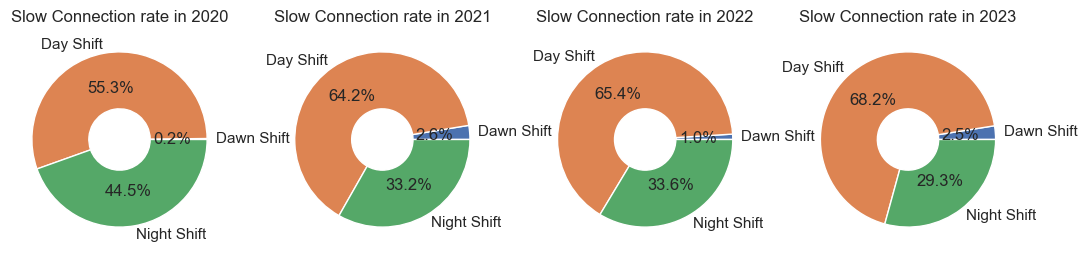

In [163]:
plt.subplot(1,4,1)
aux1 = df5.loc[df5['year'] == 2020]
aux1 = aux1.groupby('day_period')['slow_connection_order'].sum().reset_index()
plt.pie(aux1['slow_connection_order'], labels=aux1['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Slow Connection rate in 2020')

plt.subplot(1,4,2)
aux2 = df5.loc[df5['year'] == 2021]
aux2 = aux2.groupby('day_period')['slow_connection_order'].sum().reset_index()
plt.pie(aux2['slow_connection_order'], labels=aux2['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Slow Connection rate in 2021')

plt.subplot(1,4,3)
aux3 = df5.loc[df5['year'] == 2022]
aux3 = aux3.groupby('day_period')['slow_connection_order'].sum().reset_index()
plt.pie(aux3['slow_connection_order'], labels=aux3['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Slow Connection rate in 2022')

plt.subplot(1,4,4)
aux4 = df5.loc[df5['year'] == 2023]
aux4 = aux4.groupby('day_period')['slow_connection_order'].sum().reset_index()
plt.pie(aux4['slow_connection_order'], labels=aux4['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Slow Connection rate in 2023')

plt.show()

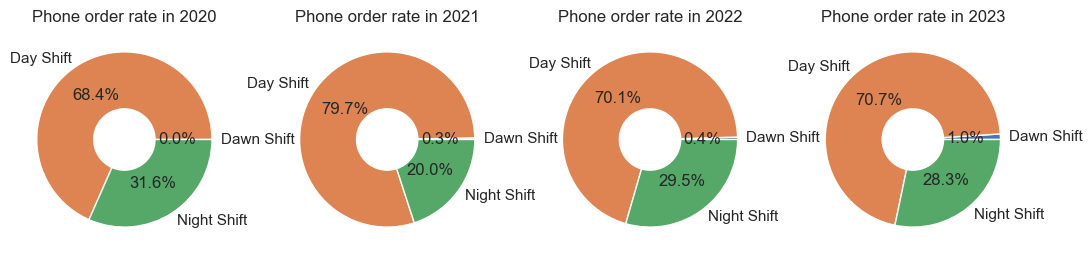

In [164]:
plt.subplot(1,4,1)
aux1 = df5.loc[df5['year'] == 2020]
aux1 = aux1.groupby('day_period')['phone_order'].sum().reset_index()
plt.pie(aux1['phone_order'], labels=aux1['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Phone order rate in 2020')

plt.subplot(1,4,2)
aux2 = df5.loc[df5['year'] == 2021]
aux2 = aux2.groupby('day_period')['phone_order'].sum().reset_index()
plt.pie(aux2['phone_order'], labels=aux2['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Phone order rate in 2021')

plt.subplot(1,4,3)
aux3 = df5.loc[df5['year'] == 2022]
aux3 = aux3.groupby('day_period')['phone_order'].sum().reset_index()
plt.pie(aux3['phone_order'], labels=aux3['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Phone order rate in 2022')

plt.subplot(1,4,4)
aux4 = df5.loc[df5['year'] == 2023]
aux4 = aux4.groupby('day_period')['phone_order'].sum().reset_index()
plt.pie(aux4['phone_order'], labels=aux4['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Phone order rate in 2023')

plt.show()

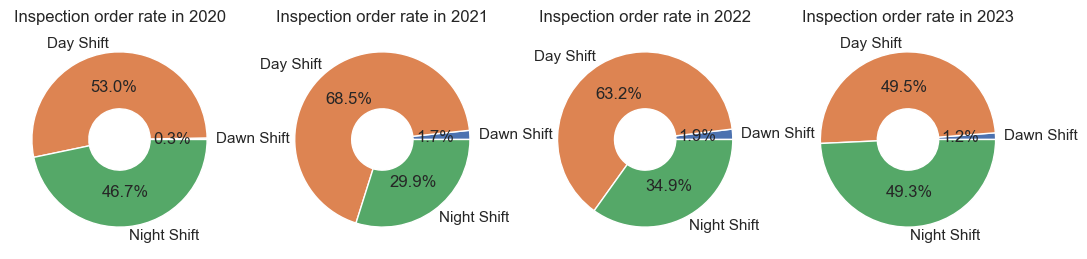

In [165]:
plt.subplot(1,4,1)
aux1 = df5.loc[df5['year'] == 2020]
aux1 = aux1.groupby('day_period')['inspection_order'].sum().reset_index()
plt.pie(aux1['inspection_order'], labels=aux1['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Inspection order rate in 2020')

plt.subplot(1,4,2)
aux2 = df5.loc[df5['year'] == 2021]
aux2 = aux2.groupby('day_period')['inspection_order'].sum().reset_index()
plt.pie(aux2['inspection_order'], labels=aux2['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Inspection order rate in 2021')

plt.subplot(1,4,3)
aux3 = df5.loc[df5['year'] == 2022]
aux3 = aux3.groupby('day_period')['inspection_order'].sum().reset_index()
plt.pie(aux3['inspection_order'], labels=aux3['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Inspection order rate in 2022')

plt.subplot(1,4,4)
aux4 = df5.loc[df5['year'] == 2023]
aux4 = aux4.groupby('day_period')['inspection_order'].sum().reset_index()
plt.pie(aux4['inspection_order'], labels=aux4['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Inspection order rate in 2023')

plt.show()

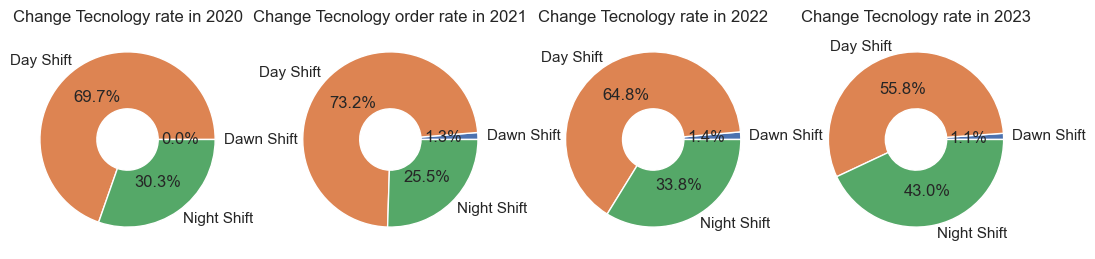

In [166]:
plt.subplot(1,4,1)
aux1 = df5.loc[df5['year'] == 2020]
aux1 = aux1.groupby('day_period')['change_tecnology_order'].sum().reset_index()
plt.pie(aux1['change_tecnology_order'], labels=aux1['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Change Tecnology rate in 2020')

plt.subplot(1,4,2)
aux2 = df5.loc[df5['year'] == 2021]
aux2 = aux2.groupby('day_period')['change_tecnology_order'].sum().reset_index()
plt.pie(aux2['change_tecnology_order'], labels=aux2['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Change Tecnology order rate in 2021')

plt.subplot(1,4,3)
aux3 = df5.loc[df5['year'] == 2022]
aux3 = aux3.groupby('day_period')['change_tecnology_order'].sum().reset_index()
plt.pie(aux3['change_tecnology_order'], labels=aux3['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Change Tecnology rate in 2022')

plt.subplot(1,4,4)
aux4 = df5.loc[df5['year'] == 2023]
aux4 = aux4.groupby('day_period')['change_tecnology_order'].sum().reset_index()
plt.pie(aux4['change_tecnology_order'], labels=aux4['day_period'], autopct='%1.1f%%', wedgeprops=dict(width=0.65))
plt.title('Change Tecnology rate in 2023')

plt.show()